# Evaluación de Modelos de Regresión Lineal

## Importar Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datos

Estos datos de muestra son de ISLR. Muestra las ventas (en miles de unidades) de un producto en particular en función de los presupuestos de publicidad (en miles de dólares) para los medios de televisión, radio y periódicos.

In [2]:
df = pd.read_csv("Advertising2.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Preguntas Aclaratorias

Anteriormente, exploramos ¿Existe una relación entre el gasto total en publicidad y las ventas? así como predecir las ventas totales para algún valor del gasto total. Ahora queremos expandir esto a **¿Cuál es la relación entre cada canal de publicidad (TV, Radio, Periódico) y las ventas?**

### Multiples Características (N-Dimensiones)

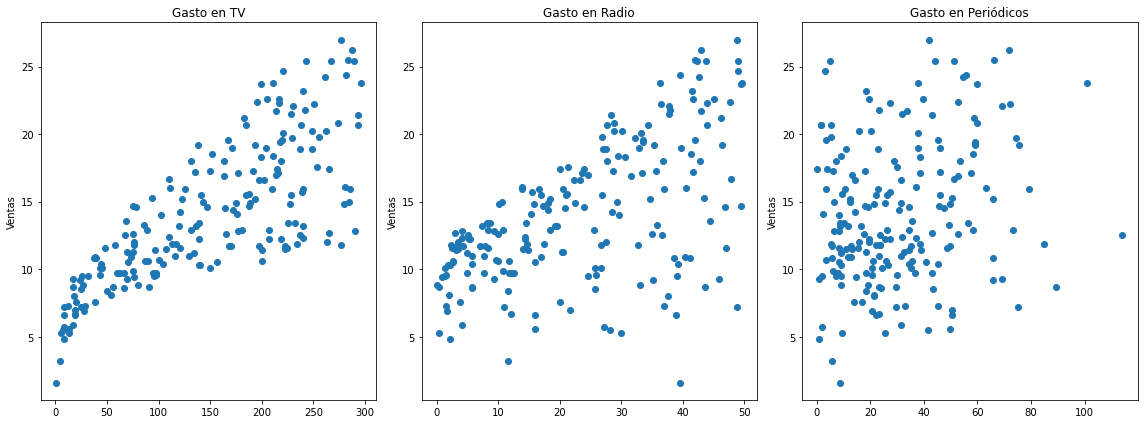

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Ventas")
axes[0].set_title("Gasto en TV")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Gasto en Radio")
axes[1].set_ylabel("Ventas")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Gasto en Periódicos");
axes[2].set_ylabel("Ventas")
plt.tight_layout();

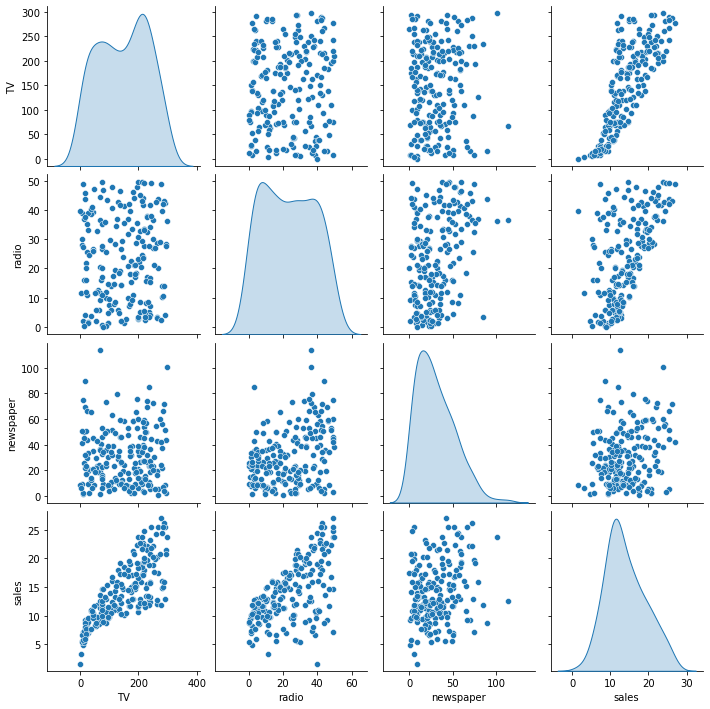

In [5]:
# Relaciones entre característica
sns.pairplot(df,diag_kind='kde')

## Determina datos de entrada y salida

In [6]:
X = df.drop('sales',axis=1)
y = df['sales']

## División de datos de entrenamiento y prueba

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Creación de un modelo

#### Importa una clase  modelo de una familia de modelos

In [9]:
from sklearn.linear_model import LinearRegression

#### Crea una instancia del modelo con parámetros.

In [10]:
modelo = LinearRegression()

### Ajustar/entrenar el modelo en los datos de entrenamiento

**Asegúrese de que solo se ajuste a los datos de entrenamiento para poder evaluar de manera justa el rendimiento de su modelo en datos futuros.**

In [11]:
modelo.fit(X_train,y_train)

LinearRegression()

In [12]:
modelo.intercept_

3.1515267680706494

In [13]:
modelo.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

# Comprender y utilizar el modelo

-----

## Evaluación en el conjunto de prueba

### Métricas

Las tres métricas de evaluación más comunes para problemas de regresión::

**Mean Absolute Error** (MAE) es el promedio de los valores absolutos de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) es el promedio de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) es la raíz cuadrada del promedio de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** es el más fácil de entender, porque es el error promedio.
- **MSE** es más popular que MAE, porque MSE "castiga" los errores más grandes, lo que tiende a ser útil en el mundo real.
- **RMSE** es incluso más popular que MSE, porque RMSE es interpretable en las unidades de "y".

Todas estas son **funciones de pérdida**, porque queremos minimizarlas.

Otra función de perdida o métrica muy conocida es : $R^2$ = Coeficiente de determinación

donde:
$$R^2 = \frac {\sum_{i=1}^n (\hat{y}_i-\bar{y})^2}  {\sum_{i=1}^n (y_i-\bar{y})^2}$$

Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será.


### Calcular el rendimiento en el conjunto de prueba

Queremos evaluar nuestro modelo de manera justa, por lo que obtenemos métricas de rendimiento en el conjunto de prueba (datos que el modelo nunca antes había visto).

In [14]:
X_test[0:5]

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [15]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
predicciones_test = modelo.predict(X_test)

In [16]:
predicciones_test[0:5]

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676])

In [17]:
y_test[0:5]

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
MAE = mean_absolute_error(y_test,predicciones_test)
MSE = mean_squared_error(y_test,predicciones_test)
RMSE = np.sqrt(MSE)
R_cuadrado = r2_score(y_test,predicciones_test)

In [27]:
MAE

1.213745773614481

In [28]:
MSE

2.2987166978863782

In [29]:
RMSE

1.516151937599388

In [23]:
df['sales'].mean()

14.022500000000003

In [30]:
R_cuadrado

0.9185780903322446

## Residuales

Acerca del Cuarteto de Anscombe: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

<table class="wikitable">
<tbody><tr>
<th>Propiedad
</th>
<th>Valor
</th>
<th>Exactitud
</th></tr>
<tr>
<td>Promedio de <i>x</i>
</td>
<td>9
</td>
<td>exacto
</td></tr>
<tr>
<td>Varianza de <i>x</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>11
</td>
<td>exacto
</td></tr>
<tr>
<td>Promedio de <i>y</i>
</td>
<td>7.50
</td>
<td>a 2 decimales
</td></tr>
<tr>
<td>Varianza de <i>y</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>4.125
</td>
<td>±0.003
</td></tr>
<tr>
<td>Correlación entre <i>x</i> y <i>y</i>
</td>
<td>0.816
</td>
<td>a 3 decimales
</td></tr>
<tr>
<td>Regresión Lineal
</td>
<td><i>y</i>&#160;=&#160;3.00&#160;+&#160;0.500<i>x</i>
</td>
<td>a 2 y 3 decimales, respectivamente
</td></tr>
<tr>
<td>Coeficiente de determinación de regresión lineal  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle R^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>R</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle R^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5ce07e278be3e058a6303de8359f8b4a4288264a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.818ex; height:2.676ex;" alt="R^{2}"/></span>
</td>
<td>0.67
</td>
<td>a 2 decimales
</td></tr></tbody></table>

In [31]:
quarteto = pd.read_csv('anscombes_quartet1.csv')

In [32]:
# y = 3.00 + 0.500x
quarteto['pred_y'] = 3 + 0.5 * quarteto['x']
quarteto['residual'] = quarteto['y'] - quarteto['pred_y']

In [38]:
quarteto

,x,y,pred_y,residual
0,10.0,8.04,8.0,0.04
1,8.0,6.95,7.0,-0.05
2,13.0,7.58,9.5,-1.92
3,9.0,8.81,7.5,1.31
4,11.0,8.33,8.5,-0.17
5,14.0,9.96,10.0,-0.04
6,6.0,7.24,6.0,1.24
7,4.0,4.26,5.0,-0.74
8,12.0,10.84,9.0,1.84
9,7.0,4.82,6.5,-1.68


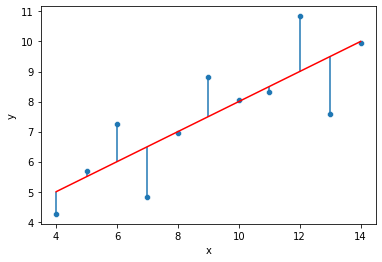

In [39]:
sns.scatterplot(data=quarteto,x='x',y='y')
sns.lineplot(data=quarteto,x='x',y='pred_y',color='red')
plt.vlines(quarteto['x'],quarteto['y'],quarteto['y']-quarteto['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

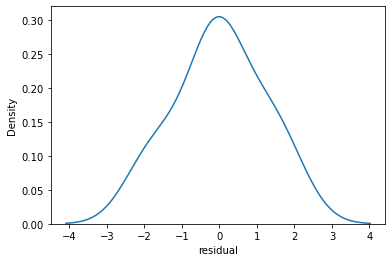

In [40]:
sns.kdeplot(quarteto['residual'])

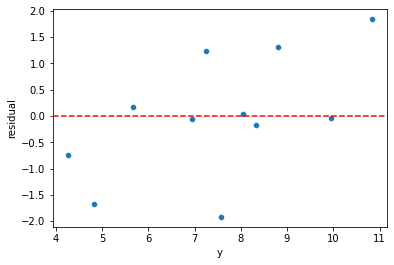

In [43]:
sns.scatterplot(data=quarteto,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
quarteto.head(11)

---

In [44]:
quarteto = pd.read_csv('anscombes_quartet2.csv')

In [45]:
quarteto.columns = ['x','y']

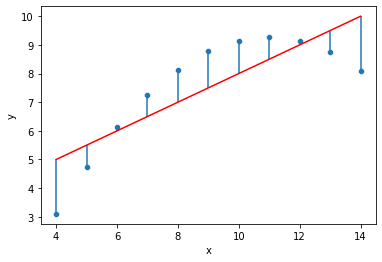

In [46]:
# y = 3.00 + 0.500x
quarteto['pred_y'] = 3 + 0.5 * quarteto['x']
quarteto['residual'] = quarteto['y'] - quarteto['pred_y']

sns.scatterplot(data=quarteto,x='x',y='y')
sns.lineplot(data=quarteto,x='x',y='pred_y',color='red')
plt.vlines(quarteto['x'],quarteto['y'],quarteto['y']-quarteto['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

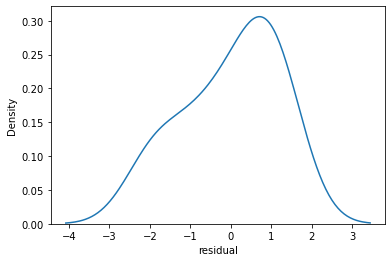

In [47]:
sns.kdeplot(quarteto['residual'])

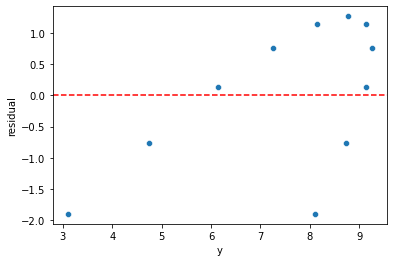

In [48]:
sns.scatterplot(data=quarteto,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [49]:
quarteto = pd.read_csv('anscombes_quartet3.csv')

In [50]:
quarteto.columns = ['x','y']

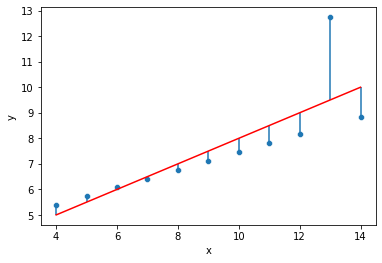

In [51]:
# y = 3.00 + 0.500x
quarteto['pred_y'] = 3 + 0.5 * quarteto['x']
quarteto['residual'] = quarteto['y'] - quarteto['pred_y']

sns.scatterplot(data=quarteto,x='x',y='y')
sns.lineplot(data=quarteto,x='x',y='pred_y',color='red')
plt.vlines(quarteto['x'],quarteto['y'],quarteto['y']-quarteto['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

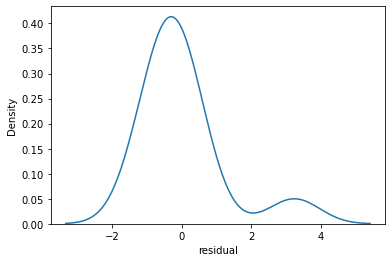

In [52]:
sns.kdeplot(quarteto['residual'])

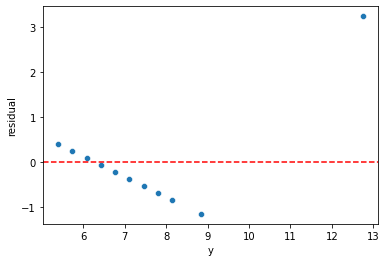

In [53]:
sns.scatterplot(data=quarteto,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [54]:
quarteto = pd.read_csv('anscombes_quartet4.csv')

In [ ]:
#quarteto

In [55]:
# y = 3.00 + 0.500x
quarteto['pred_y'] = 3 + 0.5 * quarteto['x']

In [56]:
quarteto['residual'] = quarteto['y'] - quarteto['pred_y']

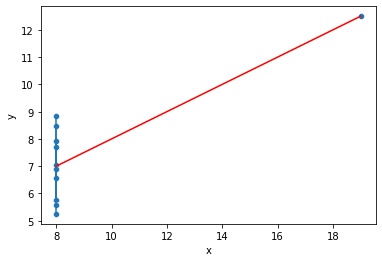

In [57]:
sns.scatterplot(data=quarteto,x='x',y='y')
sns.lineplot(data=quarteto,x='x',y='pred_y',color='red')
plt.vlines(quarteto['x'],quarteto['y'],quarteto['y']-quarteto['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

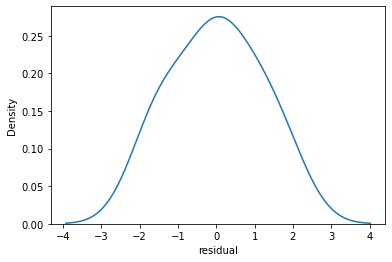

In [58]:
sns.kdeplot(quarteto['residual'])

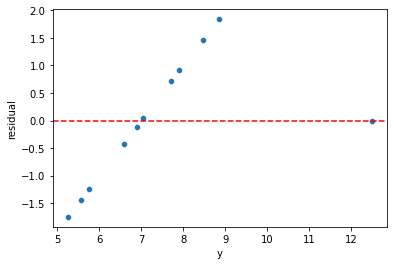

In [59]:
sns.scatterplot(data=quarteto,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

### Graficando Residuales

También es importante graficar los residuos y verificar la distribución normal, esto nos ayuda a comprender si la regresión lineal fue una opción de modelo válida.

In [60]:
predicciones_test = modelo.predict(X_test)

In [61]:
y_test[0:5]

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [62]:
predicciones_test[0:5]

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676])

In [63]:
# Si nuestro modelo fuera perfecto, todos serían ceros
res_test = y_test - predicciones_test

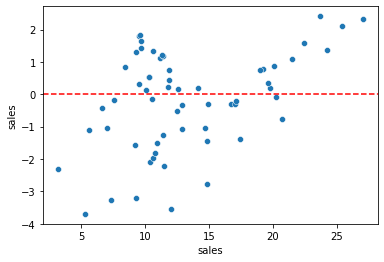

In [64]:
sns.scatterplot(x=y_test,y=res_test)
plt.axhline(y=0, color='r', linestyle='--')

In [65]:
len(res_test)

60

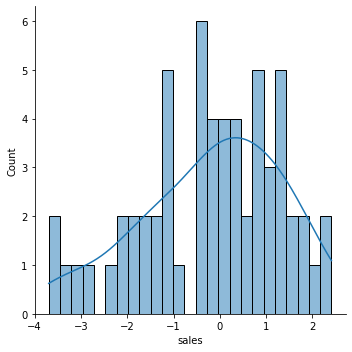

In [66]:
sns.displot(res_test,bins=25,kde=True)

¿Todavía no está seguro de si la normalidad es una aproximación razonable? Podemos verificar contra la [gráfica de probabilidad normal.](https://en.wikipedia.org/wiki/Normal_probability_plot)

In [67]:
import scipy as sp

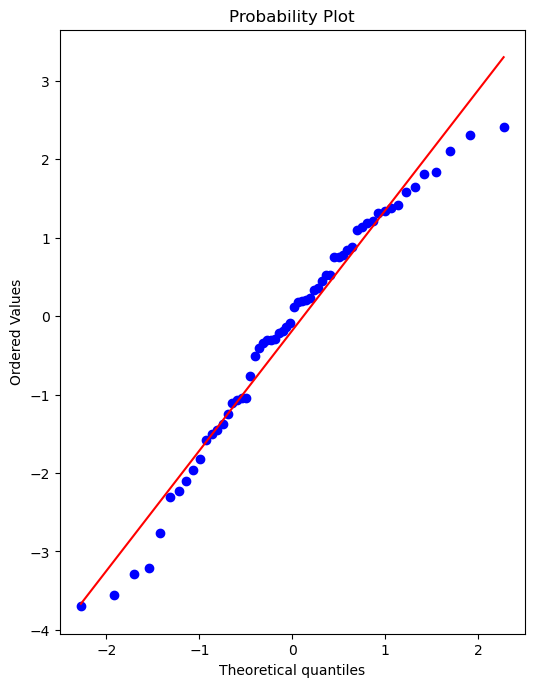

In [68]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(res_test,plot=ax)

-----------

## Reentrenamiento de modelo con datos completos

Si estamos satisfechos con el rendimiento de los datos de prueba, antes de implementar nuestro modelo en el mundo real, debemos volver a entrenar en todos nuestros datos. (Si no quedamos satisfechos, podríamos actualizar parámetros o elegir otro modelo, algo de lo que hablaremos más adelante).

In [69]:
modelo_final = LinearRegression()

In [70]:
modelo_final.fit(X,y)

LinearRegression()

Tenga en cuenta que puede que realmente no tenga sentido volver a calcular las métricas de RMSE aquí, dado que el modelo ya ha visto todos los datos, no es un juicio justo de rendimiento calcular RMSE en datos que ya se han visto, por lo tanto, el propósito del examen anterior es el desempeño de la prueba

## Predicciones y Atributos del modelo final

### Entrenamiento del Modelo Final

Hacer esto es razonable porque tenemos 3 variables

In [71]:
y_pred = modelo_final.predict(X)

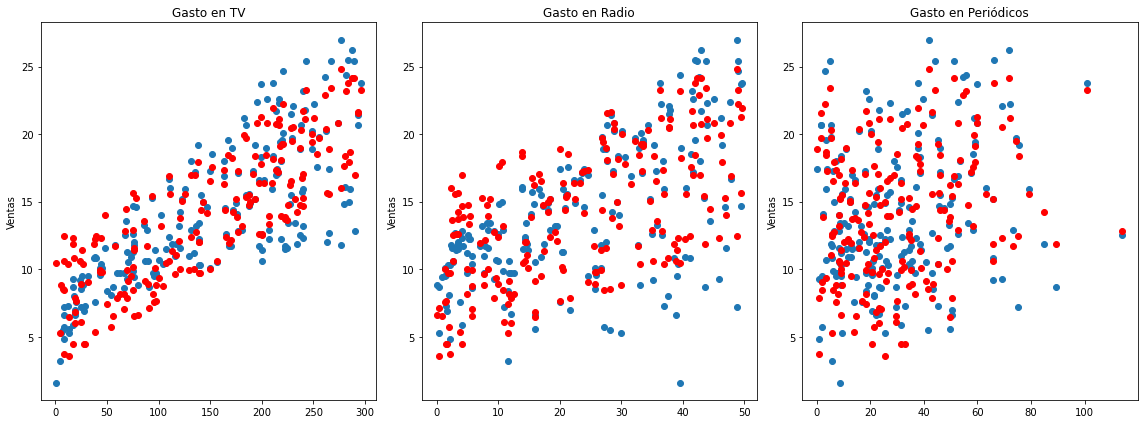

In [74]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_pred,'o',color='red')
axes[0].set_ylabel("Ventas")
axes[0].set_title("Gasto en TV")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_pred,'o',color='red')
axes[1].set_title("Gasto en Radio")
axes[1].set_ylabel("Ventas")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_pred,'o',color='red')
axes[2].set_title("Gasto en Periódicos");
axes[2].set_ylabel("Ventas")
plt.tight_layout();

#### Residuales

Deberían estar normalmente distribuidos.

In [75]:
residuales = y - y_pred

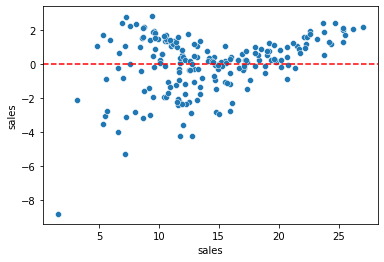

In [76]:
sns.scatterplot(x=y,y=residuales)
plt.axhline(y=0, color='red',linestyle='--')

#### Coeficientes

In [77]:
modelo_final.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [78]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [79]:
df_coef = pd.DataFrame(modelo_final.coef_,X.columns,columns=['Coeficiente'])
df_coef

,Coeficiente
TV,0.045765
radio,0.188530
newspaper,-0.001037


Interpretación de los coeficientes

* Manteniendo todas las otras características fijas, a 1 unidad (mil dólares) de incremento en el Gasto de publicidad en TV se asocia un incremento en las ventas de 0.045 unidades (en miles) vendidas, en este caso 45 unidades vendidas. Esto básicamente significa que por cada 1000 dólares de gasto en publicidad en TV, experaríamos 45 unidades vendidas más.

* Manteniendo todas las otras características fijas, a 1 unidad (mil dólares) de incremento en el Gasto de publicidad en radio se asocia un incremento en las ventas de 0.188 unidades (en miles) vendidas, en este caso 188 unidades vendidas. Esto básicamente significa que por cada 1000 dólares de gasto en publicidad en radio, experaríamos 188 unidades vendidas más.

* Manteniendo todas las otras características fijas, a 1 unidad (mil dólares) de incremento en el Gasto de publicidad en periódicos se asocia un **decremento** en las ventas de 0.001 unidades (en miles) vendidas, en este caso 1 unidad vendida. Esto básicamente significa que por cada 1000 dólares de gasto en publicidad en periódicos, experaríamos 1 unidades vendida menos. (El gasto en publicidad en períodicos no tiene efecto real en el incremento de las ventas).

In [80]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

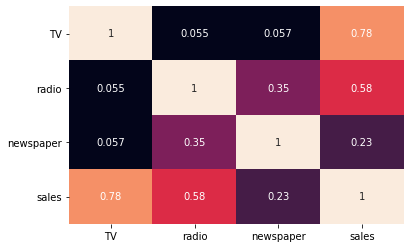

In [82]:
sns.heatmap(df.corr(),annot=True,cbar=False)

### Predicción con nuevos datos

In [83]:
campanna = [[140,21,12]]

In [84]:
modelo_final.predict(campanna)

array([13.29262017])

### Persistencia del modelo (Guardar y cargar)

In [85]:
from joblib import dump,load

Guardar

In [86]:
dump(modelo_final,'modeloVentas.joblib')

['modeloVentas.joblib']

Cargar

In [87]:
modelo_cargado = load('modeloVentas.joblib')

In [88]:
campanna2 = [[126,37,0]]

In [89]:
modelo_cargado.predict(campanna2)

array([15.68084532])